In [1]:
import pandas as pd

headlines_df_1 = pd.read_csv('./datasets/reuters_headlines.csv')
headlines_df_1.drop(columns=["Time" , "Description"] , inplace=True)
headlines_df_1 = headlines_df_1.dropna(axis=0)
headlines_df_1.drop_duplicates(keep="first")
headlines_df_1.head(5)

,Headlines
0,TikTok considers London and other locations fo...
1,Disney cuts ad spending on Facebook amid growi...
2,Trail of missing Wirecard executive leads to B...
3,Twitter says attackers downloaded data from up...
4,U.S. Republicans seek liability protections as...


In [2]:
headlines_df_2 = pd.read_csv('./datasets/guardian_headlines.csv')
headlines_df_2.drop(columns=["Time"] , inplace=True)
headlines_df_2 = headlines_df_2.dropna(axis=0)
headlines_df_2.drop_duplicates(keep="first")
headlines_df_2.head(5)

,Headlines
0,Johnson is asking Santa for a Christmas recovery
1,‘I now fear the worst’: four grim tales of wor...
2,Five key areas Sunak must tackle to serve up e...
3,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [3]:
headlines_df_3 = pd.read_csv('./datasets/cnbc_headlines.csv')
headlines_df_3.drop(columns=["Time", "Description"] , inplace=True , axis=1)
headlines_df_3 = headlines_df_3.dropna(axis=0)
headlines_df_3.drop_duplicates(keep="first")
headlines_df_3.head(5)

,Headlines
0,Jim Cramer: A better way to invest in the Covi...
1,Cramer's lightning round: I would own Teradyne
3,"Cramer's week ahead: Big week for earnings, ev..."
4,IQ Capital CEO Keith Bliss says tech and healt...
5,Wall Street delivered the 'kind of pullback I'...


### can you try and read this file and concatenate the data frame headlines_df_4 to main_df

In [4]:
headlines_df_4 = pd.read_csv('./datasets/all-data.csv')
# headlines_df_4.head()
headlines_df_4.drop(columns=["sentiment", "Unnamed: 2", "Unnamed: 3"] , inplace=True , axis=1)
headlines_df_4 = headlines_df_4.dropna(axis=0)
headlines_df_4.drop_duplicates(keep="first")
headlines_df_4.head(5)

,Headlines
0,"According to Gran , the company has no plans t..."
1,Technopolis plans to develop in stages an area...
2,The international electronic industry company ...
3,With the new production plant the company woul...
4,According to the company 's updated strategy f...


In [5]:
headlines_df_5 = pd.read_csv('./datasets/300_stock_headlines.csv' ,on_bad_lines = "skip")
headlines_df_5.drop(columns=["Unnamed: 0.1", "Unnamed: 0","url" , "publisher" , "date" , "stock"] , inplace=True , axis=1)
headlines_df_5 = headlines_df_5.dropna(axis=0)
headlines_df_5.drop_duplicates(keep="first")
headlines_df_5 = headlines_df_5.rename(columns={'headline': 'Headlines'})
headlines_df_5.head(5)

,Headlines
0,Agilent Technologies Announces Pricing of $5……...
1,Agilent (A) Gears Up for Q2 Earnings: What's i...
2,J.P. Morgan Asset Management Announces Liquida...
3,"Pershing Square Capital Management, L.P. Buys ..."
4,Agilent Awards Trilogy Sciences with a Golden ...


In [6]:
# concatenate the dataframes
main_df = pd.concat([headlines_df_1, headlines_df_2, headlines_df_3 , headlines_df_4 ,headlines_df_5])
main_df.reset_index(drop=True, inplace=True)
main_df.drop_duplicates(keep="first")
main_df

,Headlines
0,TikTok considers London and other locations fo...
1,Disney cuts ad spending on Facebook amid growi...
2,Trail of missing Wirecard executive leads to B...
3,Twitter says attackers downloaded data from up...
4,U.S. Republicans seek liability protections as...
...,...
58511,Illumina's Growth Shows No Signs of Slowing Down
58512,Agilent Technologies (A) Earnings Expected to ...
58513,Tracking Dan Loeb's Third Point Portfolio - Q3...
58514,Tracking William Von Mueffling's Cantillon Cap...


#### - prepocessing

- **Lowercase** - It is necessary to convert the text to lower case as it is case sensitive.

- **Remove punctuations** - The punctuations present in the text do not add value to the data. The punctuation, when attached to any word, will create a problem in differentiating with other words. so we have to get rid of them.

- **Remove stopwords** - Stopwords include: I, he, she, and, but, was were, being, have, etc, which do not add meaning to the data. So these words must be removed which helps to reduce the features from our data. These are removed after tokenizing the text.

- **Stemming** - A technique that takes the word to its root form. It just removes suffixes from the words. The stemmed word might not be part of the dictionary, i.e it will not necessarily give meaning.

- **lemmatizing** - Takes the word to its root form called Lemma. It helps to bring words to their dictionary form. It is applied to nouns by default. It is more accurate as it uses more informed analysis to create groups of words with similar meanings based on the context, so it is complex and takes more time. This is used where we need to retain the contextual information.




In [7]:
# Import all the required libraries 
import nltk
#import stopwords and text processing libraries
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Download NLTK resources (only required once)
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('vader_lexicon')


In [8]:
# Create a function for preprocessing 

def preprocess_text(text, stemming=False, lemmatizing=False):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in text.split() if word not in stop_words]
    
    # Apply stemming if specified
    if stemming:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]
    
    # Apply lemmatizing if specified
    if lemmatizing:
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join the preprocessed words back into a sentence
    processed_text = ' '.join(words)
    
    return processed_text  

In [9]:
# Import sentiment intensity analyzer

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')


# Create a SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jayanth/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
## TEST CODE

# Fuction to  decide sentiment as positive, negative and neutral
def get_sentiment_label(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    
    # Decide sentiment label based on compound score
    compound_score = sentiment_scores['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Example usage
headline = "Stock Market Soars Amid Positive Earnings Reports"
sentiment_label = get_sentiment_label(headline)
print("Sentiment Label:", sentiment_label)

Sentiment Label: Positive


#### applying preprocessing to the data frame

In [11]:
# before 
main_df.head()

,Headlines
0,TikTok considers London and other locations fo...
1,Disney cuts ad spending on Facebook amid growi...
2,Trail of missing Wirecard executive leads to B...
3,Twitter says attackers downloaded data from up...
4,U.S. Republicans seek liability protections as...


In [12]:
# Apply preprocessing function to the 'Description' of new dataset (combined_df_copy)
main_df['Headlines'] = main_df['Headlines'].apply(preprocess_text)

In [13]:
# Display the first few rows of the DataFrame after preprocessing
main_df.head()

,Headlines
0,tiktok considers london locations headquarters
1,disney cuts ad spending facebook amid growing ...
2,trail missing wirecard executive leads belarus...
3,twitter says attackers downloaded data eight n...
4,us republicans seek liability protections coro...


In [14]:
# Analyze polarity score of values in description and  add new column ''ds_score'' in dataset
def get_sentiment_score(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores['compound']


In [15]:
# Apply the function  which decides sentiment to  polarity score column

main_df['ds_score'] = main_df['Headlines'].apply(get_sentiment_score)

main_df.head()

,Headlines,ds_score
0,tiktok considers london locations headquarters,0.0000
1,disney cuts ad spending facebook amid growing ...,-0.4215
2,trail missing wirecard executive leads belarus...,-0.2960
3,twitter says attackers downloaded data eight n...,-0.5719
4,us republicans seek liability protections coro...,-0.6124


In [16]:

# Create a function to decide sentiment label based on polarity score
def decide_sentiment_label(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [17]:

# Apply the decide_sentiment_label function to the 'ds_score' column
main_df['sentiment_label'] = main_df['ds_score'].apply(decide_sentiment_label)

In [18]:
main_df.head()

,Headlines,ds_score,sentiment_label
0,tiktok considers london locations headquarters,0.0000,Neutral
1,disney cuts ad spending facebook amid growing ...,-0.4215,Negative
2,trail missing wirecard executive leads belarus...,-0.2960,Negative
3,twitter says attackers downloaded data eight n...,-0.5719,Negative
4,us republicans seek liability protections coro...,-0.6124,Negative


In [19]:
# Calculating the sum of each unique sentiment label
sentiment_label_counts = main_df['sentiment_label'].value_counts()

print(sentiment_label_counts)



sentiment_label
Neutral     21634
Negative    18611
Positive    18271
Name: count, dtype: int64


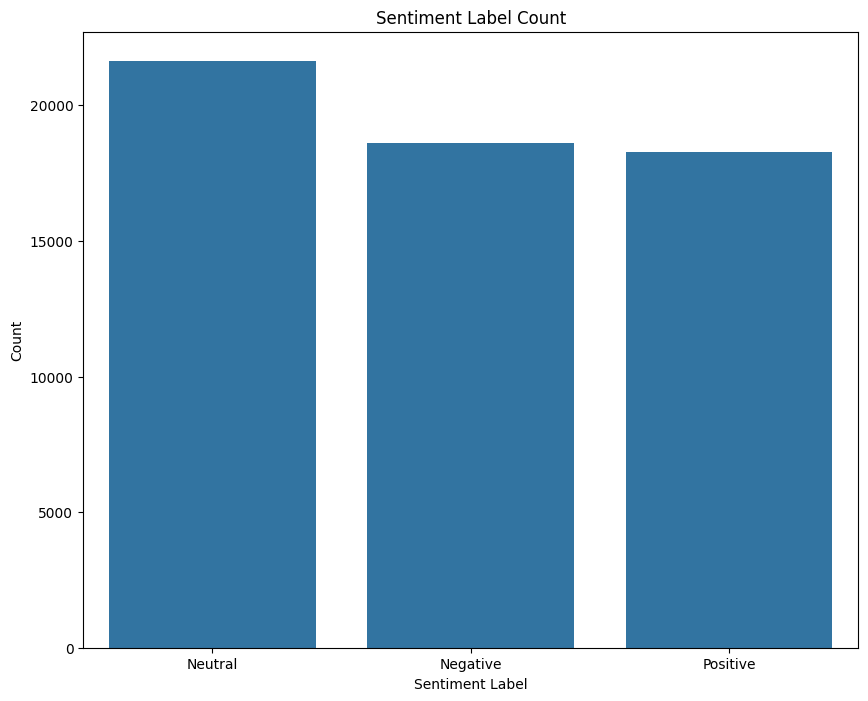

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make Count plot for Sentiment Label

plt.figure(figsize=(10, 8))
sns.countplot(data=main_df, x='sentiment_label')
plt.title('Sentiment Label Count')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

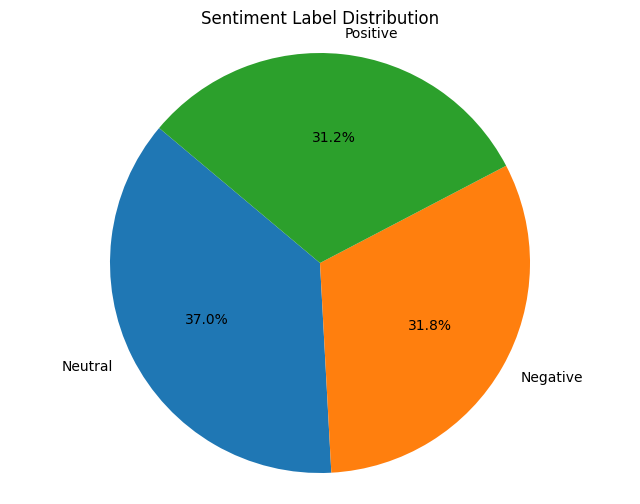

In [21]:
# Pie chart on description score column

# Calculate the counts of each sentiment label
sentiment_counts = main_df['sentiment_label'].value_counts()

# Create a pie chart for the sentiment labels
plt.figure(figsize = (8,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140 )
plt.title('Sentiment Label Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [22]:
main_df.to_csv("./datasets/final_data.csv", index=False)